# Adversarial attacks 

Adversarial attacks allow to confuse the model by for example replacing one face for another in a picture, etc.

In [92]:
from matplotlib import pyplot
import numpy

import tensorflow
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend

tensorflow.compat.v1.disable_eager_execution()

InceptionV3 is a model that is pre-trained with ImageNet, it has a lot of layers and 23 millions of parameters.

In [77]:
iv3 = InceptionV3()

In [78]:
print(iv3.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 149, 149, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 149, 149, 32) 0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

We can load an image now and convert it to an array so that we can use it as a matrix. This image results in a matrix that is 1200x1200 pixels and it has 3 layers for each of the RGB color channels.

If we had a black an white image, the last number in `x.shape` would be a one. And if it was for example RGBa, then it would be a four.

In [79]:
x = image.img_to_array(image.load_img('images/beer.jpg'))

def print_matrix(x):
    print('Shape: ' + str(x.shape))
    print('------------------------\n')
    print('Matrix:\n')
    print(x)

print_matrix(x)

Shape: (1200, 1200, 3)
------------------------

Matrix:

[[[ 60.  77.  93.]
  [ 60.  78.  92.]
  [ 60.  78.  92.]
  ...
  [157. 176. 191.]
  [157. 176. 191.]
  [157. 176. 191.]]

 [[ 60.  76.  89.]
  [ 61.  77.  90.]
  [ 61.  77.  90.]
  ...
  [158. 177. 192.]
  [158. 177. 192.]
  [157. 176. 191.]]

 [[ 63.  77.  86.]
  [ 64.  78.  87.]
  [ 64.  78.  89.]
  ...
  [159. 178. 193.]
  [158. 177. 192.]
  [158. 177. 192.]]

 ...

 [[ 83.  52.  34.]
  [ 77.  44.  25.]
  [ 78.  43.  23.]
  ...
  [154. 117. 108.]
  [153. 119. 109.]
  [162. 132. 121.]]

 [[ 71.  39.  24.]
  [ 66.  33.  16.]
  [ 63.  30.  13.]
  ...
  [163. 129. 119.]
  [163. 131. 118.]
  [166. 138. 124.]]

 [[ 89.  57.  44.]
  [ 87.  55.  40.]
  [ 83.  51.  36.]
  ...
  [162. 129. 114.]
  [164. 135. 119.]
  [164. 138. 121.]]]


In order for the image to be used by iv3, it needs to 

* be 299x299, so we have to rescale it
* the range should be between -1 and 1, rather than between 0 and 255

In [80]:
x = image.img_to_array(
    image.load_img('images/beer.jpg', target_size=(299, 299))
)

x = (x/255 - 0.5)*2

print_matrix(x)

Shape: (299, 299, 3)
------------------------

Matrix:

[[[-0.4980392  -0.38823527 -0.30196077]
  [-0.5137255  -0.38039213 -0.30196077]
  [-0.5058824  -0.372549   -0.29411763]
  ...
  [ 0.24705887  0.3803922   0.52156866]
  [ 0.24705887  0.3803922   0.5058824 ]
  [ 0.24705887  0.39607847  0.5137255 ]]

 [[-0.4980392  -0.38823527 -0.2862745 ]
  [-0.4980392  -0.36470586 -0.30196077]
  [-0.49019605 -0.35686272 -0.29411763]
  ...
  [ 0.27058828  0.4039216   0.5294118 ]
  [ 0.26274514  0.39607847  0.52156866]
  [ 0.254902    0.4039216   0.52156866]]

 [[-0.5137255  -0.372549   -0.29411763]
  [-0.49019605 -0.3490196  -0.25490195]
  [-0.5137255  -0.372549   -0.29411763]
  ...
  [ 0.24705887  0.41960788  0.5294118 ]
  [ 0.28627455  0.427451    0.5372549 ]
  [ 0.28627455  0.427451    0.5372549 ]]

 ...

 [[-0.10588235 -0.38823527 -0.5137255 ]
  [-0.12156862 -0.3960784  -0.5529412 ]
  [-0.09019607 -0.36470586 -0.5137255 ]
  ...
  [ 0.33333337  0.11372554  0.02745104]
  [ 0.2941177   0.12156868  

The neural net wants us to pass it a tensor that has 4 dimensions, where the first one is the batch and the other three are the same we already have in x.

In [81]:
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])
print('Shape: ' + str(x.shape))

Shape: (1, 299, 299, 3)


In [82]:
y = iv3.predict(x)
print_matrix(y)

Shape: (1, 1000)
------------------------

Matrix:

[[3.67296125e-05 8.08204495e-05 4.51738015e-05 5.72826284e-05
  2.25362382e-05 2.11442239e-05 5.00722708e-05 4.28182175e-05
  1.43083298e-05 3.00280226e-05 3.67994908e-05 4.73969412e-05
  3.49327856e-05 4.03759186e-05 4.43024692e-05 1.25528619e-04
  3.94665403e-05 2.99443491e-05 3.67908906e-05 4.86046629e-05
  5.79352054e-05 5.59932596e-05 4.82615687e-05 1.53178262e-05
  3.27913513e-05 3.29921349e-05 6.10556017e-05 5.30526522e-05
  6.74475014e-05 7.06603096e-05 4.82660762e-05 7.82161442e-05
  4.43359022e-05 3.61681741e-05 4.40422118e-05 2.41693033e-05
  9.43966297e-05 2.95668815e-05 6.40720027e-05 4.36257724e-05
  4.04551647e-05 3.07733244e-05 3.46236047e-05 5.66377348e-05
  5.99288906e-05 2.85935948e-05 3.32436975e-05 3.22945452e-05
  1.96070305e-05 4.42091077e-05 4.38262687e-05 1.59505016e-05
  6.38754864e-05 7.47891245e-05 1.60376047e-04 1.11309499e-04
  4.97464716e-05 2.94064812e-05 4.91637657e-05 4.84302218e-05
  8.25719908e-05 7

In [83]:
decode_predictions(y)

[[('n02823750', 'beer_glass', 0.9260917),
  ('n03063599', 'coffee_mug', 0.008763097),
  ('n03950228', 'pitcher', 0.0054980656),
  ('n02823428', 'beer_bottle', 0.0029631865),
  ('n07930864', 'cup', 0.0012253986)]]

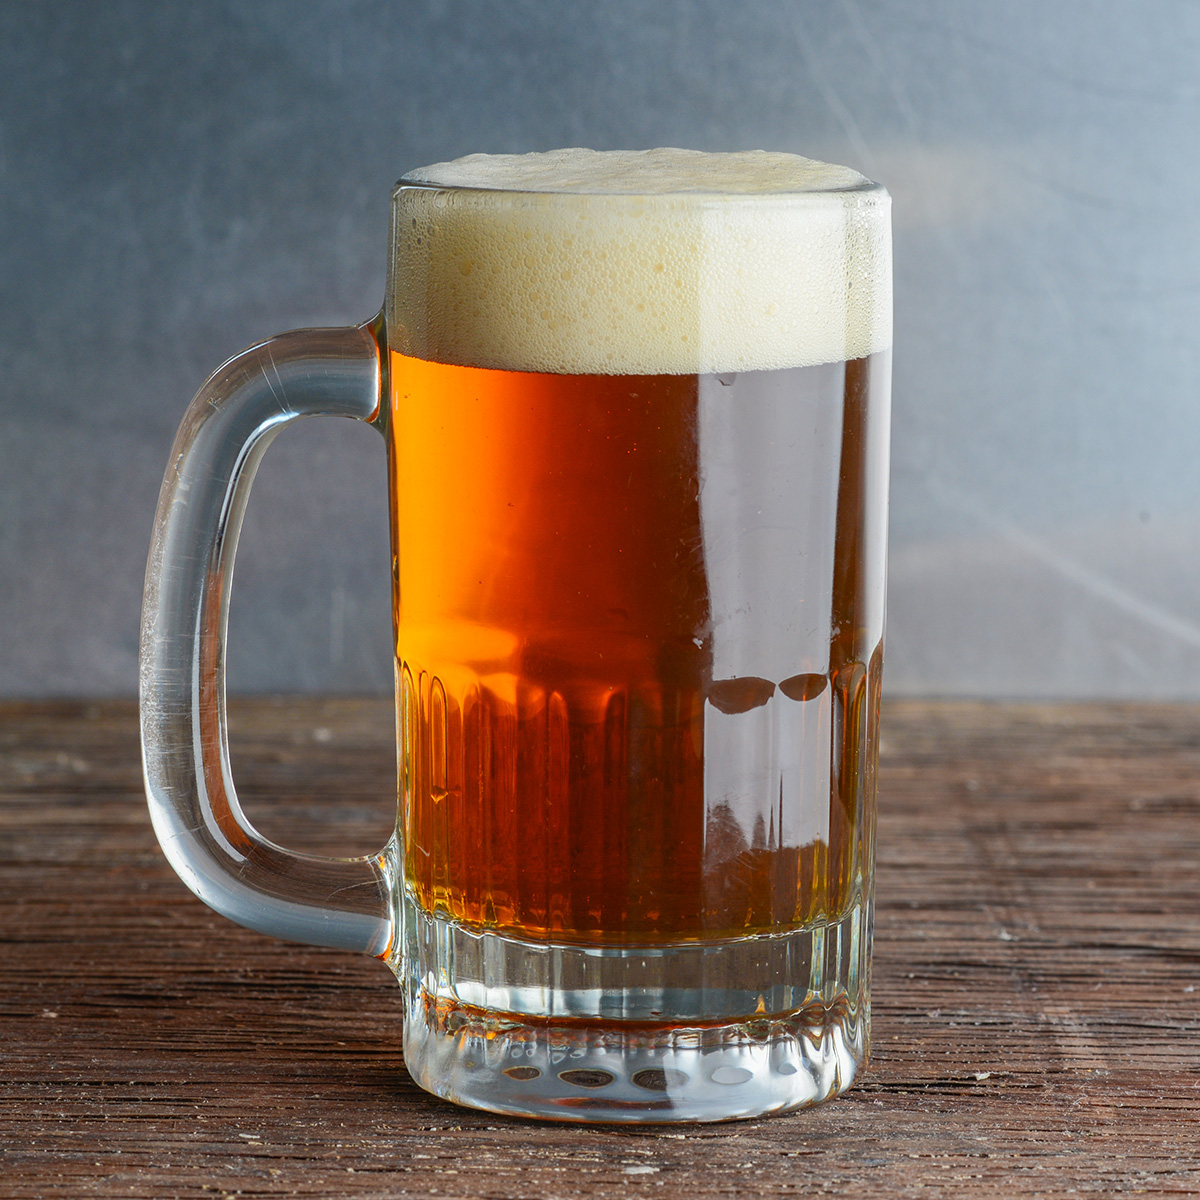

In [84]:
image.load_img('images/beer.jpg')

Let's do the same for another image

In [85]:
z = image.img_to_array(
    image.load_img('images/cat.jpg', target_size=(299, 299))
)

z = (z/255 - 0.5)*2
z = z.reshape([1, z.shape[0], z.shape[1], z.shape[2]])

a = iv3.predict(z)
decode_predictions(a)

[[('n02123045', 'tabby', 0.80959255),
  ('n02123159', 'tiger_cat', 0.07844404),
  ('n02123394', 'Persian_cat', 0.02244326),
  ('n02124075', 'Egyptian_cat', 0.0068959105),
  ('n04553703', 'washbasin', 0.002226615)]]

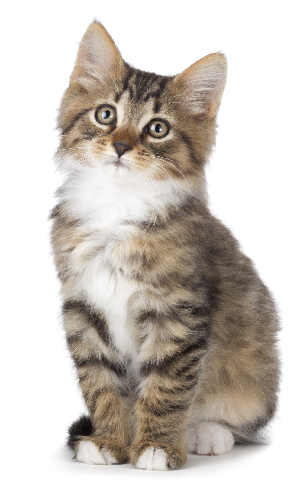

In [86]:
image.load_img('images/cat.jpg', target_size=(500, 300))

## Adversarial attacks

We have our model, and it's working fine, now we can break it. An adversarial attack is when we pass to the model an image with the intention of confusing the model. 

These atatcks are invisible to the human eye, if you look at the image you wouldn't see anything wrong with it.

We train the model using the pixels of the deformed image as the new parameters, while leaving the net parameters untouched. Usually we would adjust the parameters during training to minimize the error with an optimization process, but here we do an optimization on the input image, so that the probability of certain class is incremented.

In [87]:
input_layer = iv3.layers[0].input
print(input_layer)

KerasTensor(type_spec=TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")


In [88]:
output_layer = iv3.layers[-1].output
print(output_layer)

KerasTensor(type_spec=TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None), name='predictions/Softmax:0', description="created by layer 'predictions'")


We want to make a graph to see the optimization process of maximizing the probability that a certain class appears. So we are not only going to make the model fail, we are also going to make it predict the class we tell it to.

We want to make the probability of the class "lemon" to increase. In an optimization process, we tell the model the metric we want it to maximize. In this case it's the probability of the class lemon.

In [89]:
target_class = 951 # (lemon)

The layer that tell us the probabilities is the last layer. We tell it to maximize that class. The loss function that we want to maximize is the result of the probability of the class lemon.

In [90]:
loss = output_layer[0, target_class]

To train a model you need to find the gradient between the error and the parameters. That tells you which values you have to use to slowly minimize the error.

In this case we are not going to define the gradient with respect to the parameters, but with respect to the input.

We have to define a function that is going to run iteratively to optimize the gradient(`optimize_gradient`). This function receives the values that we are going to give it as input and the ones we expect as output.

Keras has a different modes it runs in depending if you are training or if you are testing, so if you are training you have to specify it by calling `learning_phase()`.

In [ ]:
gradient = backend.gradients(loss, input_layer)[0]

optimize_gradient = backend.function(
    [input_layer, backend.learning_phase()], 
    [gradient, loss]
)

cost = 0.0
xcopy = numpy.copy(x)

while cost < 0.95:
    optimized, cost = optimize_gradient([xcopy, 0])
    xcopy += optimized
    print('Lemon cost: ', cost)

In [ ]:
xcopy = (xcopy/2 + 0.5)*255

matplotlib.pyplot.imgshow(xcopy[0].astype(numpty.uint8))
matplotlib.pyplot.show()

This shows the image has some pixels that have been modified but it is imperceptible to the human eye, humans still see the original image.

What we have to do is not only maximize the probability of the class lemon, but also minimize the difference between the two images.

For this we just tell the model to modify the image but in a range of values.

In [ ]:
cost = 0.0
xcopy = numpy.copy(x)

minimum = x + 0.01
maximum = x - 0.01

while cost < 0.95:
    optimized, cost = optimize_gradient([xcopy, 0])

    xcopy += optimized
    xcopy = numpy.clip(xcopy, minimum, maximum)
    xcopy = numpy.clip(xcopy, -1, 1)

    print('Lemon cost: ', cost)

In [ ]:
xcopy = (xcopy/2 + 0.5)*255

matplotlib.pyplot.imgshow(xcopy[0].astype(numpty.uint8))
matplotlib.pyplot.show()

Now we can save the hacked image and use it in our model again.

In [ ]:
from PIL import Image
image = Image.fromarray(xcopy[0].astype(numpy.uint8))
image.save('images/hacked.png')

In [ ]:
hacked = image.img_to_array(
    image.load_img('images/hacked.jpg', target_size=(299, 299))
)

hacked = (hacked/255 - 0.5)*2
hacked = hacked.reshape(
    [1, hacked.shape[0], hacked.shape[1], hacked.shape[2]]
)

attacked = iv3.predict(hacked)
decode_predictions(attacked)

Be careful to save the image as PNG because since the manipulation is so subtle, if the image is saved as JPG, the compression algorithm can destroy the changes and the model can still be detecting that it's a cat.